In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [8]:
df = pd.read_csv('data/train.csv')

In [9]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [10]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


* Lots of text fields that will need to be encoded (maybe try catboost)
* Lots of missing values, especially in categoricals
* Some in numerical values that I should try to impute
* Medium number of features and not that much data (should try some simple models)
* May want to bucket some of the numerical features like year built'
* MSSubClass is actually a categorical


In [11]:
df.MSSubClass = df.MSSubClass.astype(str)
df_dummy = pd.get_dummies(df)

In [10]:
X = df_dummy.drop(['SalePrice', 'Id'], axis=1).values
y = df_dummy.SalePrice.values
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)

In [8]:
df.describe().transpose().loc[lambda x: x['count'] != 1460]

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.0,1600.0
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.0,1980.0,2002.0,2010.0


* After getting dummy variables there are 304 features which is likely too many for OLS
* Will need to use some kind of feature selection or regularization
* Still a few missing values to impute
* Try a simple pipeline with regression, random forest, gboosting

## First Pass

In [9]:
pipe = Pipeline([
    ('impute', SimpleImputer(strategy="median")),
    ('scaler', MinMaxScaler()),
    ('regressor', Ridge())
])

param_grid = [{'scaler': [MinMaxScaler(), None],
               'regressor': [RandomForestRegressor(n_estimators=100)],
               'regressor__min_samples_split': [5, 10],
               'regressor__max_features': ['sqrt', 'log2', 0.3],
              },
              {'scaler': [MinMaxScaler(), None],
               'regressor': [GradientBoostingRegressor()],
               'regressor__max_depth': [2, 3, 4, 5, 6],
               'regressor__max_features': ['sqrt', 'log2', 0.3],
              },
              {'scaler': [MinMaxScaler(), None],
               'regressor': [Ridge()],
               'regressor__alpha': [0.1, 1, 10]}
             ]

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_log_error', return_train_score=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('impute', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('regressor', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'scaler': [MinMaxScaler(copy=True, feature_range=(0, 1)), None], 'regressor': [RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_l...  normalize=False, random_state=None, solver='auto', tol=0.001)], 'regressor__alpha': [0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='neg_mean_squared_log_error', ve

In [10]:
res = pd.DataFrame(grid.cv_results_)
res['rmsle'] = np.sqrt(-res.mean_test_score)
res.loc[:, ['param_regressor', 'param_regressor__max_features', 'param_regressor__max_depth',
            'param_scaler', 'rank_test_score', 'rmsle']].sort_values('rank_test_score')

,param_regressor,param_regressor__max_features,param_regressor__max_depth,param_scaler,rank_test_score,rmsle
22,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,3,"MinMaxScaler(copy=True, feature_range=(0, 1))",1,0.130383
31,([DecisionTreeRegressor(criterion='friedman_ms...,sqrt,5,None,2,0.130594
28,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,4,"MinMaxScaler(copy=True, feature_range=(0, 1))",3,0.131099
29,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,4,None,4,0.131350
23,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,3,None,5,0.131426
30,([DecisionTreeRegressor(criterion='friedman_ms...,sqrt,5,"MinMaxScaler(copy=True, feature_range=(0, 1))",6,0.131592
34,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,5,"MinMaxScaler(copy=True, feature_range=(0, 1))",7,0.132216
35,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,5,None,8,0.132650
41,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,6,None,9,0.132802
37,([DecisionTreeRegressor(criterion='friedman_ms...,sqrt,6,None,10,0.134132


In [11]:
grid.best_params_

{'regressor': GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=3, max_features=0.3,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, n_iter_no_change=None, presort='auto',
              random_state=None, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False),
 'regressor__max_depth': 3,
 'regressor__max_features': 0.3,
 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1))}

* Ridge regression is able to do alright despite the lack of feature engineering
* Gradient Boosting does well should try others like xgboost and catboost
* Should probably look at the data to reduce the feature space.
* Should also look at residuals to seem if fit is reasonable

In [12]:
pd.Series(grid.best_estimator_.named_steps.regressor.feature_importances_,
          index=df_dummy.drop(['SalePrice', 'Id'], axis=1).columns.values).sort_values()[::-1]


OverallQual             0.308631
GrLivArea               0.199965
TotalBsmtSF             0.064417
GarageArea              0.063460
GarageCars              0.062229
1stFlrSF                0.034619
BsmtFinSF1              0.029123
LotArea                 0.022668
YearBuilt               0.020995
MasVnrArea              0.018706
TotRmsAbvGrd            0.016680
BsmtQual_Ex             0.016182
YearRemodAdd            0.013141
Fireplaces              0.010169
FullBath                0.008917
BsmtQual_Gd             0.008237
OpenPorchSF             0.008188
GarageYrBlt             0.006625
2ndFlrSF                0.006340
KitchenQual_TA          0.005804
OverallCond             0.005799
ExterQual_TA            0.004914
KitchenQual_Ex          0.004584
WoodDeckSF              0.004316
MSSubClass_60           0.003802
CentralAir_Y            0.003531
CentralAir_N            0.003017
GarageType_Attchd       0.002979
Neighborhood_Crawfor    0.002840
BsmtExposure_Gd         0.002778
          

In [13]:
np.sqrt(-grid.score(X_val, y_val))

0.12471314302112191

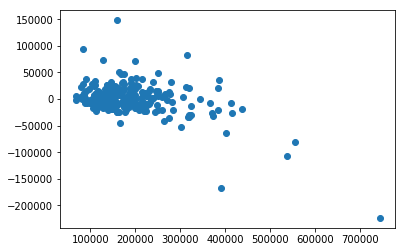

In [14]:
plt.scatter(y_val, grid.predict(X_val) - y_val)

[]

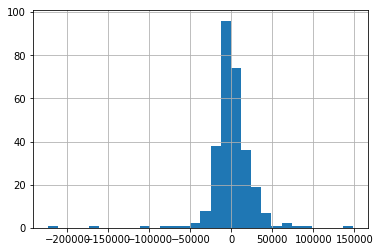

In [15]:
pd.Series(grid.predict(X_val) - y_val).hist(bins=30).plot()

((array([-2.82405984, -2.5268341 , -2.35847189, -2.23845937, -2.14401259,
         -2.06553252, -1.99803001, -1.9385663 , -1.88525859, -1.83682524,
         -1.79235285, -1.75116654, -1.712753  , -1.6767123 , -1.64272657,
         -1.6105388 , -1.57993808, -1.55074915, -1.52282467, -1.49603959,
         -1.47028677, -1.44547373, -1.42152004, -1.39835531, -1.37591755,
         -1.35415189, -1.33300949, -1.31244672, -1.29242438, -1.27290718,
         -1.25386317, -1.23526335, -1.21708133, -1.199293  , -1.18187626,
         -1.16481085, -1.14807809, -1.13166074, -1.11554287, -1.09970971,
         -1.08414754, -1.0688436 , -1.05378598, -1.03896357, -1.02436598,
         -1.00998348, -0.99580691, -0.98182771, -0.96803779, -0.95442953,
         -0.94099577, -0.92772971, -0.91462495, -0.90167541, -0.88887533,
         -0.87621926, -0.86370201, -0.85131863, -0.83906446, -0.826935  ,
         -0.814926  , -0.8030334 , -0.7912533 , -0.77958199, -0.76801592,
         -0.7565517 , -0.74518605, -0.

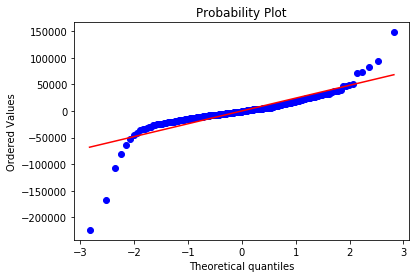

In [16]:
from scipy.stats import probplot
probplot(grid.predict(X_val) - y_val, plot=plt)

Residuals do not look normal. Pretty extreme values at either end.

## Second Pass

Only look at gradient boosting models without scaling. Use model based feature selection.

In [17]:
pipe = Pipeline([
    ('impute', SimpleImputer(strategy="median")),
    ('feature_selection', SelectFromModel(RandomForestRegressor(n_estimators=100))),
    ('regressor', GradientBoostingRegressor())
])

param_grid = { 'feature_selection': [SelectFromModel(RandomForestRegressor(n_estimators=100), threshold=0.0001),
                                     None],
               'regressor': [GradientBoostingRegressor(max_features=0.3),
                             XGBRegressor(),
                             CatBoostRegressor()],
               'regressor__max_depth': [4, 5, 6, 7, 8],
              }
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_log_error', return_train_score=False, n_jobs=-1)
grid.fit(X_train, y_train)

0:	learn: 192161.4575641	total: 67ms	remaining: 1m 6s
1:	learn: 187317.4642917	total: 80.6ms	remaining: 40.2s
2:	learn: 182537.9928070	total: 93.5ms	remaining: 31.1s
3:	learn: 177729.0055368	total: 106ms	remaining: 26.4s
4:	learn: 173163.9080325	total: 121ms	remaining: 24.2s
5:	learn: 168823.8284446	total: 134ms	remaining: 22.2s
6:	learn: 164514.7918531	total: 148ms	remaining: 20.9s
7:	learn: 160203.0403336	total: 161ms	remaining: 19.9s
8:	learn: 156150.1204491	total: 174ms	remaining: 19.1s
9:	learn: 152092.4650704	total: 187ms	remaining: 18.5s
10:	learn: 148146.2416439	total: 200ms	remaining: 17.9s
11:	learn: 144464.4738036	total: 212ms	remaining: 17.5s
12:	learn: 140899.9252965	total: 226ms	remaining: 17.2s
13:	learn: 137368.9080085	total: 239ms	remaining: 16.8s
14:	learn: 133938.6919362	total: 251ms	remaining: 16.5s
15:	learn: 130695.5084986	total: 263ms	remaining: 16.2s
16:	learn: 127528.1814729	total: 277ms	remaining: 16s
17:	learn: 124339.5341939	total: 289ms	remaining: 15.8s
18:

157:	learn: 25473.9997478	total: 2.13s	remaining: 11.3s
158:	learn: 25428.6338198	total: 2.14s	remaining: 11.3s
159:	learn: 25351.5785886	total: 2.15s	remaining: 11.3s
160:	learn: 25289.5624739	total: 2.17s	remaining: 11.3s
161:	learn: 25242.8207061	total: 2.18s	remaining: 11.3s
162:	learn: 25182.1173280	total: 2.19s	remaining: 11.3s
163:	learn: 25124.9698868	total: 2.2s	remaining: 11.2s
164:	learn: 25056.6331098	total: 2.21s	remaining: 11.2s
165:	learn: 24973.1579844	total: 2.23s	remaining: 11.2s
166:	learn: 24934.0072009	total: 2.24s	remaining: 11.2s
167:	learn: 24870.5859224	total: 2.25s	remaining: 11.2s
168:	learn: 24779.6980041	total: 2.26s	remaining: 11.1s
169:	learn: 24714.4134012	total: 2.28s	remaining: 11.1s
170:	learn: 24586.9068113	total: 2.29s	remaining: 11.1s
171:	learn: 24534.2719158	total: 2.31s	remaining: 11.1s
172:	learn: 24461.4342932	total: 2.32s	remaining: 11.1s
173:	learn: 24415.2615192	total: 2.34s	remaining: 11.1s
174:	learn: 24375.9488680	total: 2.35s	remaining:

305:	learn: 19523.2104630	total: 3.97s	remaining: 9s
306:	learn: 19493.8967260	total: 3.98s	remaining: 8.99s
307:	learn: 19445.6721155	total: 3.99s	remaining: 8.97s
308:	learn: 19430.7758522	total: 4.01s	remaining: 8.96s
309:	learn: 19403.6931938	total: 4.02s	remaining: 8.94s
310:	learn: 19373.8755729	total: 4.03s	remaining: 8.93s
311:	learn: 19360.6094395	total: 4.04s	remaining: 8.91s
312:	learn: 19354.0329264	total: 4.05s	remaining: 8.9s
313:	learn: 19342.9915733	total: 4.07s	remaining: 8.88s
314:	learn: 19331.1506625	total: 4.08s	remaining: 8.87s
315:	learn: 19304.2444128	total: 4.09s	remaining: 8.86s
316:	learn: 19293.6818225	total: 4.1s	remaining: 8.84s
317:	learn: 19288.0142397	total: 4.12s	remaining: 8.83s
318:	learn: 19253.2129769	total: 4.13s	remaining: 8.82s
319:	learn: 19231.6339909	total: 4.14s	remaining: 8.8s
320:	learn: 19207.3871876	total: 4.15s	remaining: 8.79s
321:	learn: 19170.9671836	total: 4.17s	remaining: 8.78s
322:	learn: 19141.1834627	total: 4.18s	remaining: 8.77

464:	learn: 17257.2392052	total: 5.99s	remaining: 6.89s
465:	learn: 17255.9362348	total: 6s	remaining: 6.88s
466:	learn: 17232.6163160	total: 6.01s	remaining: 6.86s
467:	learn: 17231.4398536	total: 6.02s	remaining: 6.84s
468:	learn: 17225.0620215	total: 6.03s	remaining: 6.83s
469:	learn: 17222.0156954	total: 6.04s	remaining: 6.82s
470:	learn: 17207.7731764	total: 6.06s	remaining: 6.81s
471:	learn: 17206.4893657	total: 6.07s	remaining: 6.79s
472:	learn: 17203.8892526	total: 6.08s	remaining: 6.78s
473:	learn: 17189.7287400	total: 6.1s	remaining: 6.77s
474:	learn: 17187.7141384	total: 6.11s	remaining: 6.75s
475:	learn: 17184.7873647	total: 6.12s	remaining: 6.74s
476:	learn: 17174.8571645	total: 6.13s	remaining: 6.73s
477:	learn: 17165.2992730	total: 6.15s	remaining: 6.71s
478:	learn: 17163.0276298	total: 6.16s	remaining: 6.7s
479:	learn: 17161.3387321	total: 6.17s	remaining: 6.68s
480:	learn: 17146.0132639	total: 6.18s	remaining: 6.67s
481:	learn: 17135.7000895	total: 6.2s	remaining: 6.66

625:	learn: 16547.2915094	total: 8.03s	remaining: 4.79s
626:	learn: 16545.8309305	total: 8.04s	remaining: 4.78s
627:	learn: 16545.1159249	total: 8.05s	remaining: 4.77s
628:	learn: 16539.7515685	total: 8.06s	remaining: 4.75s
629:	learn: 16537.9643647	total: 8.08s	remaining: 4.74s
630:	learn: 16529.9995330	total: 8.09s	remaining: 4.73s
631:	learn: 16525.9247874	total: 8.1s	remaining: 4.72s
632:	learn: 16521.2858836	total: 8.12s	remaining: 4.71s
633:	learn: 16520.9216820	total: 8.13s	remaining: 4.69s
634:	learn: 16520.2724994	total: 8.14s	remaining: 4.68s
635:	learn: 16519.2354396	total: 8.15s	remaining: 4.67s
636:	learn: 16518.4976045	total: 8.16s	remaining: 4.65s
637:	learn: 16511.6912293	total: 8.18s	remaining: 4.64s
638:	learn: 16508.8087962	total: 8.19s	remaining: 4.63s
639:	learn: 16508.3189453	total: 8.2s	remaining: 4.61s
640:	learn: 16505.8305081	total: 8.22s	remaining: 4.6s
641:	learn: 16505.4095204	total: 8.23s	remaining: 4.59s
642:	learn: 16501.6177673	total: 8.24s	remaining: 4

783:	learn: 16109.2166785	total: 10s	remaining: 2.76s
784:	learn: 16105.6184195	total: 10s	remaining: 2.75s
785:	learn: 16102.9970313	total: 10.1s	remaining: 2.74s
786:	learn: 16102.6227434	total: 10.1s	remaining: 2.72s
787:	learn: 16101.7718831	total: 10.1s	remaining: 2.71s
788:	learn: 16101.4863959	total: 10.1s	remaining: 2.7s
789:	learn: 16101.2783330	total: 10.1s	remaining: 2.68s
790:	learn: 16100.2083538	total: 10.1s	remaining: 2.67s
791:	learn: 16100.0556705	total: 10.1s	remaining: 2.66s
792:	learn: 16099.2230543	total: 10.1s	remaining: 2.65s
793:	learn: 16098.7571772	total: 10.1s	remaining: 2.63s
794:	learn: 16098.3449687	total: 10.2s	remaining: 2.62s
795:	learn: 16098.0338712	total: 10.2s	remaining: 2.61s
796:	learn: 16097.8282010	total: 10.2s	remaining: 2.59s
797:	learn: 16095.5890625	total: 10.2s	remaining: 2.58s
798:	learn: 16095.3332883	total: 10.2s	remaining: 2.57s
799:	learn: 16094.8794204	total: 10.2s	remaining: 2.56s
800:	learn: 16094.4303551	total: 10.2s	remaining: 2.5

942:	learn: 15797.5774455	total: 12s	remaining: 726ms
943:	learn: 15796.2891293	total: 12s	remaining: 714ms
944:	learn: 15795.9281746	total: 12s	remaining: 701ms
945:	learn: 15795.6065830	total: 12.1s	remaining: 688ms
946:	learn: 15780.3745442	total: 12.1s	remaining: 675ms
947:	learn: 15780.2959493	total: 12.1s	remaining: 663ms
948:	learn: 15779.1734344	total: 12.1s	remaining: 650ms
949:	learn: 15779.0450985	total: 12.1s	remaining: 637ms
950:	learn: 15774.2169060	total: 12.1s	remaining: 624ms
951:	learn: 15773.8785249	total: 12.1s	remaining: 612ms
952:	learn: 15773.6240316	total: 12.1s	remaining: 599ms
953:	learn: 15771.7874631	total: 12.2s	remaining: 586ms
954:	learn: 15764.3063287	total: 12.2s	remaining: 573ms
955:	learn: 15759.9011670	total: 12.2s	remaining: 561ms
956:	learn: 15751.6773847	total: 12.2s	remaining: 548ms
957:	learn: 15750.9239466	total: 12.2s	remaining: 535ms
958:	learn: 15750.6681022	total: 12.2s	remaining: 522ms
959:	learn: 15746.3168793	total: 12.2s	remaining: 510m

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('impute', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('feature_selection', SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
         ...one, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'feature_selection': [SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
 ...catboost.core.CatBoostRegressor object at 0x7fe9f386b2e8>], 'regressor__max_depth': [4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=T

In [18]:
grid.best_params_

{'feature_selection': None,
 'regressor': <catboost.core.CatBoostRegressor at 0x7fe9f386b2e8>,
 'regressor__max_depth': 7}

In [19]:
res = pd.DataFrame(grid.cv_results_)
res['rmsle'] = np.sqrt(-res.mean_test_score)
res.loc[:, ['param_regressor', 'param_regressor__max_depth', 'param_feature_selection',
            'rank_test_score', 'rmsle']].sort_values('rank_test_score')

,param_regressor,param_regressor__max_depth,param_feature_selection,rank_test_score,rmsle
28,<catboost.core.CatBoostRegressor object at 0x7...,7,None,1,0.128189
15,"GradientBoostingRegressor(alpha=0.9, criterion...",4,None,2,0.129908
13,<catboost.core.CatBoostRegressor object at 0x7...,7,SelectFromModel(estimator=RandomForestRegresso...,3,0.130004
27,<catboost.core.CatBoostRegressor object at 0x7...,6,None,4,0.130318
12,<catboost.core.CatBoostRegressor object at 0x7...,6,SelectFromModel(estimator=RandomForestRegresso...,5,0.131044
29,<catboost.core.CatBoostRegressor object at 0x7...,8,None,6,0.131506
10,<catboost.core.CatBoostRegressor object at 0x7...,4,SelectFromModel(estimator=RandomForestRegresso...,7,0.131868
11,<catboost.core.CatBoostRegressor object at 0x7...,5,SelectFromModel(estimator=RandomForestRegresso...,8,0.132154
26,<catboost.core.CatBoostRegressor object at 0x7...,5,None,9,0.132653
20,"XGBRegressor(base_score=0.5, booster='gbtree',...",4,None,10,0.132904


In [20]:
np.sqrt(-grid.score(X_val, y_val))

0.1315463869344899

* Cat boost seems to do well but might do even better if I hadn't one hot encoded the data.
* Feature selection seemed to help a little with a low threshold

## Catboost

In [12]:
df[df.select_dtypes(include=['object']).columns] =  df.select_dtypes(include=['object']).fillna('None')
X = df.drop(['SalePrice', 'Id'], axis=1).values
y = df.SalePrice.values
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)

In [13]:
# subract one to account for id as first col
cat_cols = [df.columns.get_loc(x) - 1 for x in df.select_dtypes(include=['object']).columns.values]

In [24]:
from catboost import Pool, cv

train_pool = Pool(X_train, y_train, cat_features=cat_cols)
test_pool = Pool(X_val, cat_features=cat_cols) 
for d in range(4,8):
    param_grid = { 
                   'depth': d,
                   'loss_function': 'RMSE',
                  }

    cv_results = cv(train_pool, param_grid, iterations=1000, fold_count=5, logging_level='Silent')
    print(d, cv_results['test-RMSE-mean'].min())

4 29014.547213254886
5 28788.754434451857
6 28651.90339042642
7 27996.1481433496


In [19]:
cv_results

,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std
0,191881.667246,4466.364378,191951.531030,1107.884584
1,186845.834719,4461.135623,186927.681515,1149.500742


In [43]:
model = CatBoostRegressor(iterations=500, depth=4, loss_function='RMSE')
model.fit(train_pool, eval_set=test_pool)

0:	learn: 191944.7200029	test: 5502.2642029	best: 5502.2642029 (0)	total: 9.91ms	remaining: 4.95s
1:	learn: 186894.6036263	test: 10646.1983613	best: 5502.2642029 (0)	total: 20.8ms	remaining: 5.17s
2:	learn: 181902.5076990	test: 15838.9273333	best: 5502.2642029 (0)	total: 32.9ms	remaining: 5.46s
3:	learn: 177092.1165441	test: 20886.6193490	best: 5502.2642029 (0)	total: 43.1ms	remaining: 5.34s
4:	learn: 172372.5869496	test: 25698.9275295	best: 5502.2642029 (0)	total: 54.1ms	remaining: 5.36s
5:	learn: 167855.5741189	test: 30401.2498870	best: 5502.2642029 (0)	total: 67.1ms	remaining: 5.53s
6:	learn: 163520.3042361	test: 34829.4483955	best: 5502.2642029 (0)	total: 77.3ms	remaining: 5.45s
7:	learn: 159192.1966124	test: 39234.7587563	best: 5502.2642029 (0)	total: 93.2ms	remaining: 5.73s
8:	learn: 155278.7918401	test: 43417.7735369	best: 5502.2642029 (0)	total: 102ms	remaining: 5.54s
9:	learn: 151326.7945421	test: 47425.7139216	best: 5502.2642029 (0)	total: 111ms	remaining: 5.44s
10:	learn: 14

86:	learn: 37322.0348412	test: 176516.9200617	best: 5502.2642029 (0)	total: 824ms	remaining: 3.91s
87:	learn: 37007.6632416	test: 176960.9915997	best: 5502.2642029 (0)	total: 836ms	remaining: 3.91s
88:	learn: 36679.0033988	test: 177456.6605780	best: 5502.2642029 (0)	total: 846ms	remaining: 3.91s
89:	learn: 36397.0944451	test: 177944.7508398	best: 5502.2642029 (0)	total: 858ms	remaining: 3.91s
90:	learn: 36120.5452796	test: 178395.0959057	best: 5502.2642029 (0)	total: 865ms	remaining: 3.88s
91:	learn: 35862.2452184	test: 178857.4100958	best: 5502.2642029 (0)	total: 876ms	remaining: 3.88s
92:	learn: 35546.2281438	test: 179288.9850517	best: 5502.2642029 (0)	total: 886ms	remaining: 3.88s
93:	learn: 35302.4486987	test: 179678.0393565	best: 5502.2642029 (0)	total: 892ms	remaining: 3.85s
94:	learn: 35057.3587786	test: 180071.0103176	best: 5502.2642029 (0)	total: 901ms	remaining: 3.84s
95:	learn: 34868.6565360	test: 180452.4971502	best: 5502.2642029 (0)	total: 911ms	remaining: 3.83s
96:	learn:

172:	learn: 26926.4747314	test: 193442.7230649	best: 5502.2642029 (0)	total: 1.64s	remaining: 3.1s
173:	learn: 26882.4021176	test: 193480.6183093	best: 5502.2642029 (0)	total: 1.65s	remaining: 3.09s
174:	learn: 26862.8052242	test: 193538.0846307	best: 5502.2642029 (0)	total: 1.65s	remaining: 3.07s
175:	learn: 26832.5490473	test: 193590.8100636	best: 5502.2642029 (0)	total: 1.66s	remaining: 3.06s
176:	learn: 26830.4976789	test: 193619.3616417	best: 5502.2642029 (0)	total: 1.67s	remaining: 3.05s
177:	learn: 26797.3825099	test: 193662.5896784	best: 5502.2642029 (0)	total: 1.68s	remaining: 3.04s
178:	learn: 26765.0046145	test: 193731.4711825	best: 5502.2642029 (0)	total: 1.69s	remaining: 3.04s
179:	learn: 26737.5687308	test: 193776.0523255	best: 5502.2642029 (0)	total: 1.7s	remaining: 3.03s
180:	learn: 26712.4408233	test: 193829.4788055	best: 5502.2642029 (0)	total: 1.71s	remaining: 3.02s
181:	learn: 26705.9890692	test: 193866.6065535	best: 5502.2642029 (0)	total: 1.72s	remaining: 3.01s
18

266:	learn: 24483.6505840	test: 195550.4698778	best: 5502.2642029 (0)	total: 2.45s	remaining: 2.14s
267:	learn: 24481.2487653	test: 195559.4900438	best: 5502.2642029 (0)	total: 2.46s	remaining: 2.13s
268:	learn: 24470.7199375	test: 195598.2936590	best: 5502.2642029 (0)	total: 2.47s	remaining: 2.12s
269:	learn: 24414.7541402	test: 195600.3217614	best: 5502.2642029 (0)	total: 2.48s	remaining: 2.11s
270:	learn: 24396.5148286	test: 195619.2221160	best: 5502.2642029 (0)	total: 2.49s	remaining: 2.11s
271:	learn: 24381.8788288	test: 195605.2658855	best: 5502.2642029 (0)	total: 2.5s	remaining: 2.1s
272:	learn: 24380.5645457	test: 195613.5914217	best: 5502.2642029 (0)	total: 2.51s	remaining: 2.09s
273:	learn: 24369.6244513	test: 195604.0718370	best: 5502.2642029 (0)	total: 2.52s	remaining: 2.08s
274:	learn: 24367.6148969	test: 195606.6980354	best: 5502.2642029 (0)	total: 2.53s	remaining: 2.07s
275:	learn: 24367.1907659	test: 195612.0685067	best: 5502.2642029 (0)	total: 2.53s	remaining: 2.06s
27

350:	learn: 22936.2301472	test: 195658.2647616	best: 5502.2642029 (0)	total: 3.26s	remaining: 1.38s
351:	learn: 22935.2323010	test: 195658.2580047	best: 5502.2642029 (0)	total: 3.27s	remaining: 1.37s
352:	learn: 22929.4302835	test: 195659.2506162	best: 5502.2642029 (0)	total: 3.28s	remaining: 1.37s
353:	learn: 22919.6830579	test: 195667.2978167	best: 5502.2642029 (0)	total: 3.29s	remaining: 1.36s
354:	learn: 22901.9213569	test: 195668.2866223	best: 5502.2642029 (0)	total: 3.3s	remaining: 1.35s
355:	learn: 22866.7353227	test: 195666.9067736	best: 5502.2642029 (0)	total: 3.31s	remaining: 1.34s
356:	learn: 22864.4171367	test: 195665.0237172	best: 5502.2642029 (0)	total: 3.32s	remaining: 1.33s
357:	learn: 22855.2674870	test: 195676.3237835	best: 5502.2642029 (0)	total: 3.33s	remaining: 1.32s
358:	learn: 22834.4642200	test: 195631.9173309	best: 5502.2642029 (0)	total: 3.34s	remaining: 1.31s
359:	learn: 22833.0141779	test: 195637.6906352	best: 5502.2642029 (0)	total: 3.35s	remaining: 1.3s
36

453:	learn: 21722.9850565	test: 196013.0343186	best: 5502.2642029 (0)	total: 4.27s	remaining: 433ms
454:	learn: 21697.4850585	test: 196011.2726682	best: 5502.2642029 (0)	total: 4.28s	remaining: 423ms
455:	learn: 21660.5177320	test: 196016.7221278	best: 5502.2642029 (0)	total: 4.29s	remaining: 414ms
456:	learn: 21658.4287382	test: 196019.5049158	best: 5502.2642029 (0)	total: 4.3s	remaining: 404ms
457:	learn: 21641.6048156	test: 196028.1088301	best: 5502.2642029 (0)	total: 4.31s	remaining: 395ms
458:	learn: 21639.1783525	test: 196030.9257127	best: 5502.2642029 (0)	total: 4.32s	remaining: 386ms
459:	learn: 21636.5837623	test: 196027.9957504	best: 5502.2642029 (0)	total: 4.33s	remaining: 377ms
460:	learn: 21632.7046656	test: 196032.8446317	best: 5502.2642029 (0)	total: 4.34s	remaining: 368ms
461:	learn: 21614.5049606	test: 196045.5174351	best: 5502.2642029 (0)	total: 4.35s	remaining: 358ms
462:	learn: 21607.0997317	test: 196054.3837633	best: 5502.2642029 (0)	total: 4.36s	remaining: 349ms
4

In [44]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(model.predict(X_val), y_val)

0.020240679680221113

In [45]:
test = pd.read_csv('data/test.csv')
test.MSSubClass = test.MSSubClass.astype(str)
test[test.select_dtypes(include=['object']).columns] =  test.select_dtypes(include=['object']).fillna('None')
X_test = test.drop('Id', axis=1).loc[:, df.drop(['SalePrice', 'Id'], axis=1).columns].values

y_pred = model.predict(X_test)
pd.DataFrame({'SalePrice': y_pred}, index=pd.read_csv('data/test.csv').Id).to_csv('output/pred.csv')

## Prepare submission

In [21]:
test = pd.read_csv('data/test.csv')
test.MSSubClass = test.MSSubClass.astype(str)
test = pd.get_dummies(test)
X_test = test.drop('Id', axis=1).loc[:, df_dummy.drop(['SalePrice', 'Id'], axis=1).columns].values

pipe = Pipeline([
    ('impute', SimpleImputer(strategy="median")),
    ('regressor', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=4, max_features=0.3,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, n_iter_no_change=None, presort='auto',
              random_state=None, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False))
])
pipe.fit(X,y)
y_pred = pipe.predict(X_test)

/home/will/kaggle/kaggle/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [22]:
pd.DataFrame({'SalePrice': y_pred}, index=pd.read_csv('data/test.csv').Id).to_csv('output/pred.csv')

In [23]:
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])